In [11]:
import pandas as pd
import os
import seaborn as sns
path = '/media/greg/jrn-DataProducts/JORNADA_IM/WIP_packages/210549002_soil_crust_physiology_(hoellrich)/'

In [42]:
df = pd.read_csv(os.path.join(path, 'JRN549002_Cfix_and_lightresponse.csv'))

In [46]:
df.shape

(499, 24)

In [38]:
df.groupby(['Site', 'Type','Rep']).count()

Time  Thickness  Water  PercentWater  Cfix  Respiration  Net  \
Site Type Rep                                                                 
AMT  CVL  1       5          5      5             5     5            5    5   
          2       5          5      5             5     5            5    5   
          3       5          5      4             4     5            5    5   
          4       5          5      5             5     5            5    5   
          5       5          5      5             5     5            5    5   
...             ...        ...    ...           ...   ...          ...  ...   
WHS  PTL  1       5          5      5             5     5            5    5   
          2       5          5      5             5     5            5    5   
          3       5          5      5             5     5            5    5   
          4       5          5      5             5     5            5    5   
          5       5          5      5             5     5            5    5   

               QuantumYield  SaturatingPPFD  PAR0  ...  PAR50  PAR100  PAR150  \
Site Type Rep                                      ...                          
AMT  CVL  1               5               5     5  ...      5       5       5   
          2               5               5     5  ...      5       5       5   
          3               5               5     5  ...      5       5       5   
          4               5               5     5  ...      5       5       5   
          5               2               5     5  ...      5       5       5   
...                     ...             ...   ...  ...    ...     ...     ...   
WHS  PTL  1               5               5     5  ...      5       5       5   
          2               5               5     5  ...      5       5       5   
          3               5               5     5  ...      5       5       5   
          4               4               5     5  ...      5       5       5   
          5               5               5     5  ...      5       5       5   

               PAR300  PAR500  PAR750  PAR1000  PAR1250  PAR1600  PAR2000  
Site Type Rep                                                              
AMT  CVL  1         5       5       5        5        5        5        5  
          2         5       5       5        5        5        5        5  
          3         5       5       5        5        5        5        5  
          4         5       5       5        5        5        5        5  
          5         5       5       5        5        5        5        5  
...               ...     ...     ...      ...      ...      ...      ...  
WHS  PTL  1         5       5       5        5        5        5        5  
          2         5       5       5        5        5        5        5  
          3         5       5       5        5        5        5        5  
          4         5       5       5        5        5        5        5  
          5         5       5       5        5        5        5        5  

[100 rows x 21 columns]

In [7]:
[c for c in df.columns if 'PAR' in c]

['PAR0',
 'PAR25',
 'PAR50',
 'PAR100',
 'PAR150',
 'PAR300',
 'PAR500',
 'PAR750',
 'PAR1000',
 'PAR1250',
 'PAR1600',
 'PAR2000']

In [31]:
test = pd.melt(df, id_vars=['Site','Type','Time','Rep'],
               value_vars=[c for c in df.columns if 'PAR' in c])
#test['PAR'] = test.variable[3::]
test['PAR'] = test['variable'].str[3:].astype(int)
test.tail()

,Site,Type,Time,Rep,variable,value,PAR
5983,WHS,PTL,two,1,PAR2000,-2.450630,2000
5984,WHS,PTL,two,2,PAR2000,0.773195,2000
5985,WHS,PTL,two,3,PAR2000,3.688885,2000
5986,WHS,PTL,two,4,PAR2000,0.146193,2000
5987,WHS,PTL,two,5,PAR2000,0.495236,2000


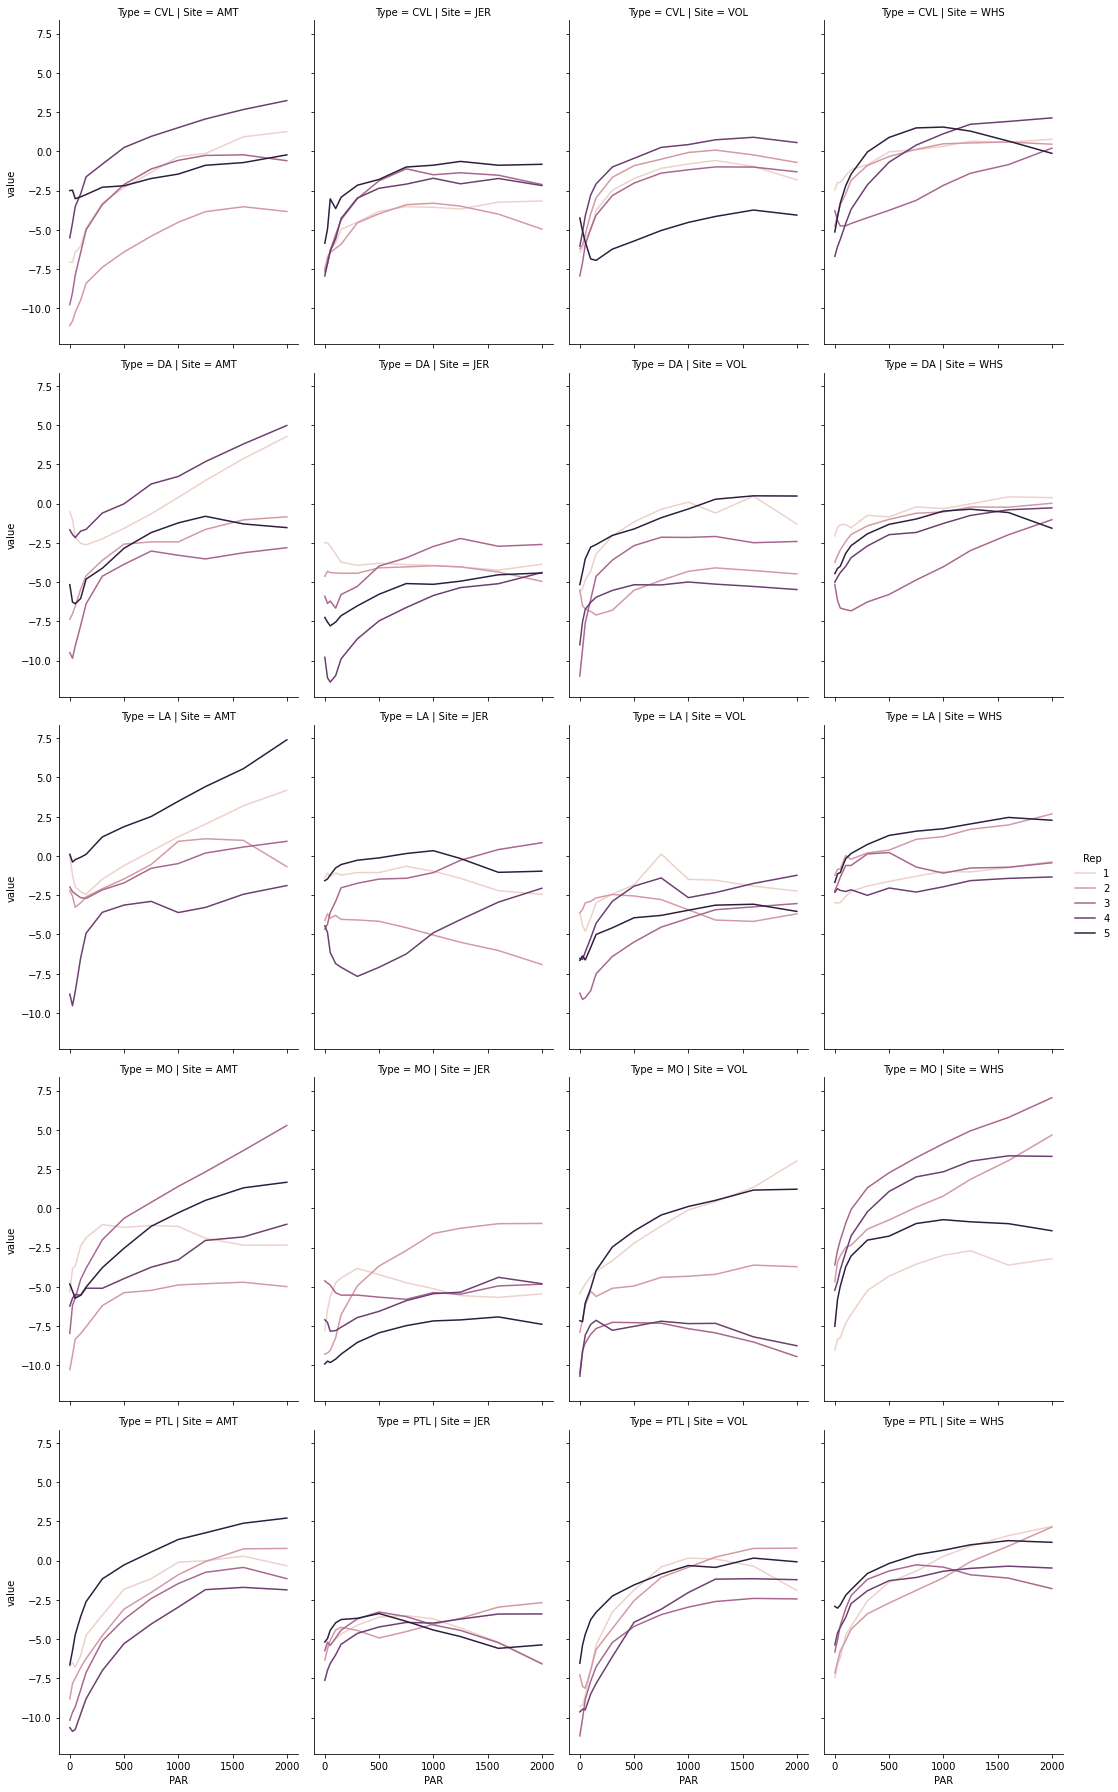

In [32]:
g = sns.relplot(
    data=test.loc[test.Time=='six',:],
    x="PAR", y="value",
    hue="Rep", col="Site", row="Type",
    kind="line", 
    height=5, aspect=.75
)